# Using Mutual Information Method to select the Features from the Dataset by `Mr. Harshit Dawar!`

In [1]:
# Importing the required Libraries!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest, SelectPercentile

# Process for Classfication Problem

In [2]:
# Importing the Dataset!

data = pd.read_csv("../ds/dataset_2.csv")

In [3]:
data.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


In [65]:
# Separating the Target & the Predictor Variables

X, y = data.drop("target", axis = 1), data.target.values

In [11]:
y

array([1, 0, 0, ..., 1, 1, 1])

In [22]:
# Calculating the Mutual Information (MI) between the Target & the Predictor Variables!
'''This Method uses the concept of joint probability & determines how similar 2 variables are when
   they are taken together, or when they are taken independently. If the MI is less, then one can provide
   less information about the other. In that case, we can drop the feature.'''

Mutual_Information = mutual_info_classif(X, y)
Mutual_Information

array([1.52751086e-03, 5.42163594e-03, 0.00000000e+00, 1.45996267e-03,
       0.00000000e+00, 3.26274648e-03, 4.67221956e-03, 3.13299621e-03,
       0.00000000e+00, 5.63213495e-04, 2.00499867e-05, 1.66569266e-03,
       8.06114891e-04, 5.73175563e-03, 8.58166607e-04, 1.15973732e-02,
       6.96993174e-04, 1.67156792e-03, 1.54242833e-04, 4.63427760e-04,
       4.27505289e-03, 2.78930220e-03, 9.29135421e-05, 0.00000000e+00,
       9.42041204e-04, 3.08368456e-04, 0.00000000e+00, 5.41505786e-04,
       2.01025546e-03, 3.49097432e-03, 0.00000000e+00, 0.00000000e+00,
       4.90403588e-03, 1.93800447e-02, 1.02033677e-03, 3.37860659e-03,
       7.89762349e-04, 2.03770803e-03, 1.48206551e-03, 0.00000000e+00,
       0.00000000e+00, 2.04425532e-04, 9.69148768e-04, 3.15318457e-03,
       0.00000000e+00, 6.00795120e-04, 1.97857333e-03, 4.46863290e-03,
       0.00000000e+00, 0.00000000e+00, 9.43420475e-04, 2.68603605e-03,
       4.22568662e-04, 3.23628400e-03, 3.96465927e-02, 2.26240433e-03,
      

In [23]:
# Creating a Pandas Dataframe with the same Column Names & then sorting them to get the highest MI 
# which is followed by the bar chart representation!
Mutual_Information = pd.DataFrame(Mutual_Information, index = X.columns)


In [33]:
Mutual_Information = Mutual_Information.iloc[:, 0].sort_values(ascending = False)

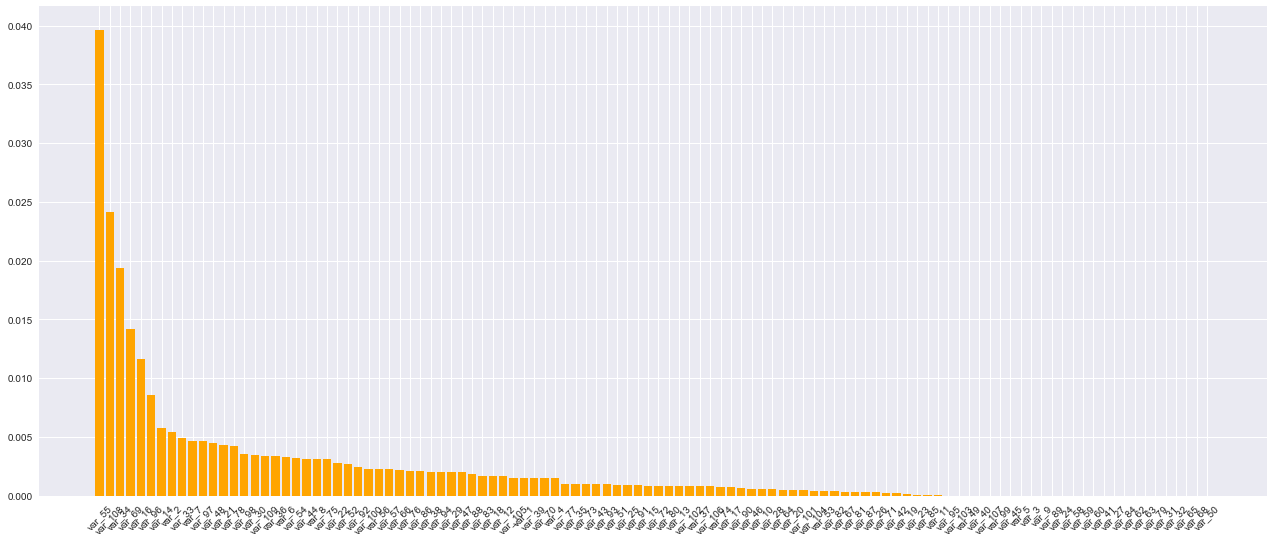

In [58]:
plt.style.use("seaborn")
plt.figure(figsize = (22, 9))
plt.bar(Mutual_Information.index, Mutual_Information, color = "orange")
plt.xticks(ticks = range(X.shape[1]), labels = Mutual_Information.index, rotation = 45)
plt.show()

## Selecting the Features based on the MI Method!

### Method 1 - Selecting Top 'K' Features based on MI directly without calculating MI First!

In [59]:
# Selecting the Top 15 Features!

Feature_Selector = SelectKBest(mutual_info_classif, k = 15)
Feature_Selector.fit(X, y)

SelectKBest(k=15, score_func=<function mutual_info_classif at 0x7f92576cdb00>)

In [61]:
# Dropping rest features from the Dataset
X = Feature_Selector.transform(X)

In [64]:
# Printing the Selected Columns
X.shape

(50000, 15)

***As you can see, only 15 columns are present in the dataset***

### Method 2 - Selecting Top 'K' Features based on Top N Percentile without calculating MI First!

In [66]:
# Selecting the Features in top 15% of MI!

Feature_Selector = SelectPercentile(mutual_info_classif, percentile = 15)
Feature_Selector.fit(X, y)

SelectPercentile(percentile=15,
                 score_func=<function mutual_info_classif at 0x7f92576cdb00>)

In [68]:
X.columns[Feature_Selector.get_support()]

Index(['var_2', 'var_6', 'var_7', 'var_14', 'var_16', 'var_21', 'var_30',
       'var_33', 'var_34', 'var_48', 'var_55', 'var_69', 'var_78', 'var_96',
       'var_97', 'var_98', 'var_108'],
      dtype='object')

In [69]:
# Tranforming the Dataset
X = Feature_Selector.transform(X)

In [70]:
X.shape

(50000, 17)

***As you can see, only 17 columns are present in the top 15% based on the MI in the dataset***

# Process for Regression Problem

In [71]:
from sklearn.datasets import load_boston

In [72]:
X, y = load_boston(return_X_y = True)

In [74]:
X.shape, y.shape

((506, 13), (506,))